<hr style="height:1px; width:100%">

<h1 style="color:#336699">TASK 03P: Working with Numpy Matrices</h1>

<p style="color:#204060; font-size:16px";>
    Created by: &emsp;&emsp;&emsp; Mick Wiedermann<br>
    Student Number: &ensp;2220-58299<br>
    Email Address: &emsp;&ensp; mwiedermann@deakin.edu.au<br><br>
    <i>Computer Science Undergraduate - Data Science Major</i>
</p>

<hr style="height:1px; width:100%">


<p style="color:#336699; font-size:16px";><i>Importing the required modules</i></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn')
import scipy.stats as st
import seaborn as sns

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 1: Downloading & Importing the Data</h3>

* Downloading the two excerpts from the National Health and Nutrition Examination Survey (NHANES dataset).

In [2]:
female = pd.read_csv('https://raw.githubusercontent.com/gagolews/'
                      + 'teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv', comment='#')
male = pd.read_csv('https://raw.githubusercontent.com/gagolews/'
                        + 'teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv', comment='#')

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 2: Read as Numpy Matrices</h3>

* Reading the two files as numpy matrices naming them male and female.

In [3]:
female = female.to_numpy()
print(female.shape)
female[:5, :] # Data preview (5 rows all columns)

(4221, 7)


array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2]])

In [4]:
male = male.to_numpy()
print(male.shape)
male[:5, :] # Data preview (5 rows all columns)

(4081, 7)


array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3],
       [ 99.4, 181.6,  40.4,  39.9,  36. , 120.2, 107. ]])

Column values from left to right are as follows:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 3: Draw Two Histograms for Heights</h3>

* On a single plot (using `matplotlib.pytplot.subplot`), drawing two histograms: one for male heights (top subfigure) and one for female heights (bottom subfigure). Also, calling `matplotlib.pyplot.xlim` in order to make the X axis limits identical for both subfigures.

Checking the min and max values to determine a range for the histograms x axis.

In [5]:
print(f'Female min height:\t{np.min(female[:,1])}\nFemale max height:\t{np.max(female[:,1])}')
print(f'Male min height:\t{np.min(male[:,1])}\nMale max height:\t{np.max(male[:,1])}')

Female min height:	131.1
Female max height:	189.3
Male min height:	144.6
Male max height:	199.6


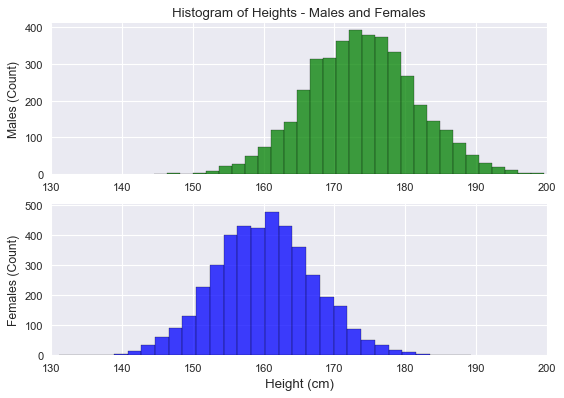

In [6]:
plt.figure(dpi=80)

plt.subplot(211)
plt.title('Histogram of Heights - Males and Females')
plt.ylabel('Males (Count)')
plt.hist(male[:,1], 30, facecolor='g', edgecolor='black', alpha=0.75)
plt.xlim(130, 200)

plt.subplot(212)
plt.title('')
plt.ylabel('Females (Count)')
plt.hist(female[:,1], 30, facecolor='b', edgecolor='black', alpha=0.75)
plt.xlabel('Height (cm)', size=12)

# Setting the x axis limits to 130 and 200 based on the above values. 
plt.xlim(130, 200) 

plt.show()

As expected from a collection of human heights each of the plots look to be normally distributed. Interesting to see the shift of the distribution for females so far to the left of the distribution for males. 

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 4: Draw Two Box & Whisker Plots for Heights</h3>

* Calling `matplotlib.pyplot.boxplot` to draw a box-and-whisker plot with both boxes side by side, so that the male and female heights can be easily compared.

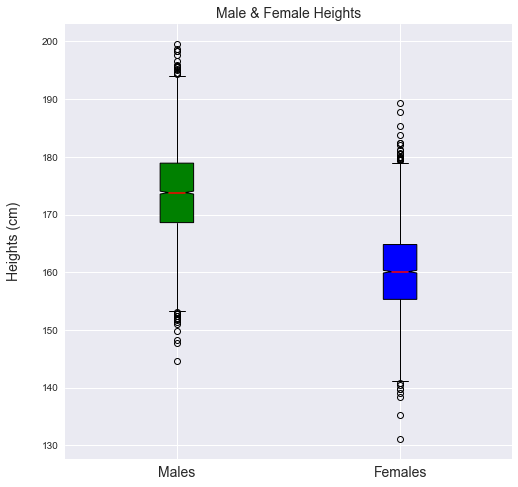

In [7]:
heights = [male[:,1], female[:,1]]
colours = ['g', 'b'] # Colours from the above plots

# Initialising the boxplots
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
bp = ax.boxplot(heights, patch_artist=True, notch ='True')

# Styling the boxplots to match above colours
for patch, colour in zip(bp['boxes'], colours):
    patch.set_facecolor(colour)
    
for median in bp['medians']:
    median.set(color ='red', linewidth = 1.5)
    
# Setting the title and label names
plt.title('Male & Female Heights', size=14)
plt.ylabel('Heights (cm)\n', size=14)
ax.set_xticklabels(['Males', 'Females'], size=14)

plt.show()

Examining the above boxplots comparing male and female heights, we can see that the mean male height at around 174 cm lands squarely in the upper quartile for the female heights while the female mean of around 160 cm is approximately centred in the lower quartile for males. Based on the position of the boxes we can also see that 75% of all males are taller than 75% of all females.

Further, we can see that both the female and male heights are approcimately normally distributed from the shape of the boxes and the position of the mean line being centred on the box as well as the whiskers in each plot being approximately the same length and not too stretched out. There are a few outliers but nothing extreme and roughly the same number at each end of both distributions. 

Based on the means we can approximate that males are on average around 14 cm taller than females.  

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 5: Computing Basic Numerical Aggregates</h3>

* Computing the basic numerical aggregates of the male and female heights (measures of location, dispersion,and shape) and describing the two distributions.

We'll start by comparing the mean and median of each the male and female heights. 

In [8]:
# Female Heights
f_mode = st.mode(female[:,1].round())
print(f'Female\n Mean:{(np.mean(female[:,1])).round(2)}  Median:{(np.median(female[:,1]))}  Mode:{f_mode[0]}')

Female
 Mean:160.14  Median:160.1  Mode:[158.]


In [9]:
# Male Heights
m_mode = st.mode(male[:,1].round())
print(f'Male\n Mean:{(np.mean(male[:,1])).round(2)}  Median:{(np.median(male[:,1]))}  Mode:{m_mode[0]}')

Male
 Mean:173.83  Median:173.8  Mode:[176.]


In [13]:
st.skew(male[:,1]), st.skew(female[:,1])

(0.018749535133802897, 0.0811184528074054)

When we have a normally distributed sample we expect the mean, median, and mode to be the same value. When we call `numpy.mean()` and `numpy.median` on both the male and female heights we see exactly what we'd expect based on the plots above, approximate equal values in both cases. The mode, however, in both cases is slightly off. Calling `scipy.stats.skew` to inspect this further reveals a very slight skew to the right for both male and female but more or less confirms the symmetry of our samples. Therefore, we can conclude that both the male and female heights are reasonably symmetricaly distributed and approximately normal.

Next we'll look at the standard deviation using `numpy.std()`, the interquartile range, and the range to compare the spead between both male and female heights.

In [10]:
print(f'Male STD:{(np.std(male[:,1])).round(2)}, Female STD:{(np.std(female[:,1])).round(2)}')

Male STD:7.66, Female STD:7.06


In [11]:
male_range = np.max(male[:,1])-np.min(male[:,1])
female_range = np.max(female[:,1])-np.min(female[:,1])

print(f'Male Range:{(male_range).round(2)}, Female Range:{(female_range).round(2)}')

Male Range:55.0, Female Range:58.2


In [12]:
male_iqr = np.quantile(male[:,1], 0.75)-np.quantile(male[:,1], 0.25) 
female_iqr = np.quantile(female[:,1], 0.75)-np.quantile(female[:,1], 0.25)

print(f'Male IQR:{(male_iqr).round(2)}, Female IQR:{(female_iqr).round(2)}')

Male IQR:10.3, Female IQR:9.5


Both the standard deviation and interquartile range (IQR) are methods of measuring the spread in data. The IQR, however, is not sensitive to outliers where the standard deviation is. 

The IQR here for males indicates that there is only a 10cm variation between the inner 50% of heights which isn't a large variation. Further, the standard deviation for males being 7.66 confirms that the data is approximately normally distributed in terms of variation. The IQR for females has less variation again with the inner 50% of heights varying only 9.5cm's and a standard deviation of 7.06. Again hinting to an approximate normal distribution spread.   

Although the IQR and standard deviation tell us that there is slightly less spead in female heights, when we include the outliers the male heights have a smaller range. As we discount the outliers this is no more than an interesting observation.

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 6: Adding an Eighth Column</h3>

* Adding an eighth column to the male matix which gives the body mass indices of all the male participants.

Firstly we will loop through all particpants in the male dataset and calculate their BMI's adding the results to a new numpy array.

In [14]:
bmis = np.array([]) # Empty Array.

for weight, height in zip(male[:,0], male[:,1]):
    bmi = (weight/((height/100)*(height/100))).round(2) # Calculate BMI and round.
    bmis = np.append(bmis, bmi) # Add BMI to array.
    
bmis

array([29.73, 21.9 , 30.2 , ..., 38.23, 25.55, 21.28])

Now to reshape the array ready to append it to the male dataset. 

In [15]:
print(male.shape, bmis.shape) # Check Shape.
bmis_reshape = bmis.reshape(-1,1) # Reshape ready to append.
print(bmis_reshape.shape) # Check Shape.

(4081, 7) (4081,)
(4081, 1)


Appending the BMI's to the male dataset.

In [16]:
male = np.append(male, bmis_reshape, axis=1) # Appending the BMIs.

Lastley, to confirm we have an eighth column we will check the shape and preview the data.

In [17]:
print(male.shape) 
male[:5,:] # Preview 5 rows and all columns.

(4081, 8)


array([[ 98.8 , 182.3 ,  42.  ,  40.1 ,  38.2 , 108.2 , 120.4 ,  29.73],
       [ 74.3 , 184.2 ,  41.1 ,  41.  ,  30.2 ,  94.5 ,  86.8 ,  21.9 ],
       [103.7 , 185.3 ,  47.  ,  44.  ,  32.  , 107.8 , 109.6 ,  30.2 ],
       [ 86.  , 167.8 ,  39.5 ,  38.4 ,  29.  , 106.4 , 108.3 ,  30.54],
       [ 99.4 , 181.6 ,  40.4 ,  39.9 ,  36.  , 120.2 , 107.  ,  30.14]])

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 7: Creating a New Matrix</h3>

* Creating a new matrix "zmale" being the version of the male dataset with all its columns standardised by computing the z-scores of each column.

In [18]:
rows = len(male[:,0]) # Number of rows. 
cols = len(male[0,:]) # Number of columns.
zmale = np.array([]) # New numpy array (for new matrix).

for i in range(cols): # for each column.
    z_col = np.array([]) # new column array (reset for each column).
    
    for j in range(rows): # for each element in current column.
        z_score = ((male[j,i]-np.mean(male[:,i]))/np.std(male[:,i])).round(3) # Calc z score.
        z_col = np.append(z_col, z_score) # Append to columns array.
    
    z_col = z_col.reshape(-1,1) # Reshape ready to append to new matrix
    
    if len(zmale) == 0: # If z_col is the first column.
        zmale = z_col
    else:
        zmale = np.append(zmale, z_col, axis=1) # Append each z_col to the zmale matrix. 
    
zmale[:5,:] # Preview first 5 rows, all columns. 

array([[ 0.487,  1.106,  1.143, -0.386,  0.808,  0.303,  1.125,  0.093],
       [-0.657,  1.354,  0.774, -0.106, -0.864, -0.819, -0.906, -1.148],
       [ 0.716,  1.497,  3.196,  0.827, -0.488,  0.271,  0.472,  0.167],
       [-0.11 , -0.787,  0.117, -0.915, -1.115,  0.156,  0.394,  0.221],
       [ 0.515,  1.015,  0.486, -0.448,  0.348,  1.286,  0.315,  0.158]])

Lastly, to confirm that all the conversions have been made we can check the shape of our new matrix against the original male matrix. 

In [19]:
print(zmale.shape, '\n', male.shape)

(4081, 8) 
 (4081, 8)


<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Task 8: Drawing a Scatterplot Pairplot</h3>

* Drawing a scatterplot matrix (pairplot) for the standardised versions of **height, weight, waist circumference, hip circumference, and BMI** of the males (based on zmale). Also, computing Pearson’s and Spearman’s correlation coefficients for all these pairs of variables then interpreting the obtained results.

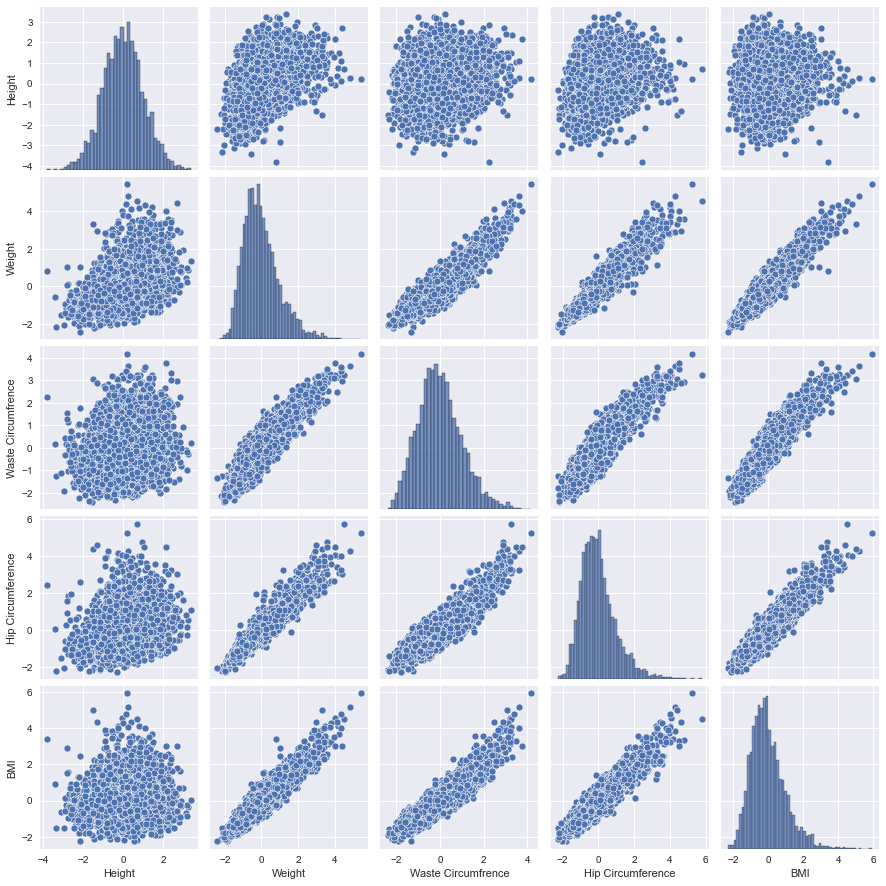

In [20]:
sns.pairplot(data=pd.DataFrame(
    zmale[:, [1, 0, 6, 5, 7]],
    columns=['Height', 'Weight', 'Waste Circumfrence', 'Hip Circumference', 'BMI']
));

Reviewing the scatter plots above, ignoring the diagonal where each variable is compared to itself, we can see a strong positive correlation between every pair of variables except for height. The height of a male seems to have no relationship to any other variable including BMI which we would expect some correlation. This maybe a result of not having enough healthy BMIs in our sample to create a positive correlation, the unhealthy BMIs must far outweight the healthy. Lets check that. 

In [52]:
# WHO Healthy BMI Range: 18.5 and 24.9.
participants = len(male[:,0])

healthy_bmis = (male[:,-1] >= 18.5) & (male[:,-1] <= 24.9)
healthy_bmi_count = np.count_nonzero(healthy_bmis)

print(f'Number of Participants: {participants}\nNumber of Healthy BMIs: {healthy_bmi_count}')

Number of Participants: 4081
Number of Healthy BMIs: 990


Ok, so around 25% of participants have a healthy BMI which I would expect to form some sort of trend. Looking at height and weight we can see a weak positive trend, then looking at weight and BMI we see a strong positive trend, so maybe the fact that BMI and height doesn't correlate has to do with the squaring of the height to calculate the BMI. It is interesting that nothing else seems to correlate with height though.   

Moving on to calculate the Pearson and Spearman correlation coefficients. Firstly, to extract each column of interest into it's own array for ease of data management. 

In [21]:
height = zmale[:,1]
weight = zmale[:,0]
waste_circ = zmale[:,6]
hip_circ =zmale[:,5]
bmi = zmale[:,7]

bmi.shape

(4081,)

Now to calculate the Pearson's coefficient for each of the variable pairs. 

In [22]:
p_height_weight = (st.pearsonr(height, weight))
p_height_waste_circ = (st.pearsonr(height, waste_circ))
p_height_hip_circ = (st.pearsonr(height, hip_circ))
p_height_bmi = (st.pearsonr(height, bmi))

p_weight_waste_circ = (st.pearsonr(weight, waste_circ))
p_weight_hip_circ = (st.pearsonr(weight, hip_circ))
p_weight_bmi = (st.pearsonr(weight, bmi))

p_waste_circ_hip_circ = (st.pearsonr(waste_circ, hip_circ))
p_waste_circ_bmi = (st.pearsonr(waste_circ, bmi))

p_hip_circ_bmi = (st.pearsonr(hip_circ, bmi))

In [23]:
print("Pearson's Correlation Coefficients")
print(f'Height v Weight:\t{p_height_weight[0]}'
      + f'\nHeight v Waste Circ:\t{p_height_waste_circ[0]}'
      + f'\nHeight v Hip Circ:\t{p_height_hip_circ[0]}'
      + f'\nHeight v BMI:\t\t{p_height_bmi[0]}'
      + f'\nWeight v Waste Circ:\t{p_weight_waste_circ[0]}'
      + f'\nWeight v Hip Circ:\t{p_weight_hip_circ[0]}'
      + f'\nWeight v BMI:\t\t{p_weight_bmi[0]}'
      + f'\nWaste Circ V Hip Circ:\t{p_waste_circ_hip_circ[0]}'
      + f'\nWaste Circ v BMI:\t{p_waste_circ_bmi[0]}'
      + f'\nHip Circ v BMI:\t\t{p_hip_circ_bmi[0]}')

Pearson's Correlation Coefficients
Height v Weight:	0.4341476920247051
Height v Waste Circ:	0.17573401687662552
Height v Hip Circ:	0.30222749023268275
Height v BMI:		0.08039955543135463
Weight v Waste Circ:	0.898953057023907
Weight v Hip Circ:	0.9419011520580718
Weight v BMI:		0.9293642650378534
Waste Circ V Hip Circ:	0.8946965361034597
Waste Circ v BMI:	0.9242413919546021
Hip Circ v BMI:		0.9245973980613543


This provides us with the Pearson Coefficient for each of our variable pairs. The first thing that stands out is that height isn't strongly correlated with anything. This list of coefficients and the code used to create it isn't exactly aesthetically pleasing, it would be nicer and easier to compare each of these in a heat map so let's create one. First, we'll reduce our zmale matrix to only include the variables of interest.

In [24]:
zmale_reduced = zmale
zmale_reduced = np.delete(zmale_reduced, [2, 3, 4], 1)
print(zmale_reduced.shape)
zmale_reduced[:5,:]

(4081, 5)


array([[ 0.487,  1.106,  0.303,  1.125,  0.093],
       [-0.657,  1.354, -0.819, -0.906, -1.148],
       [ 0.716,  1.497,  0.271,  0.472,  0.167],
       [-0.11 , -0.787,  0.156,  0.394,  0.221],
       [ 0.515,  1.015,  1.286,  0.315,  0.158]])

Now to generate the heatmap. 

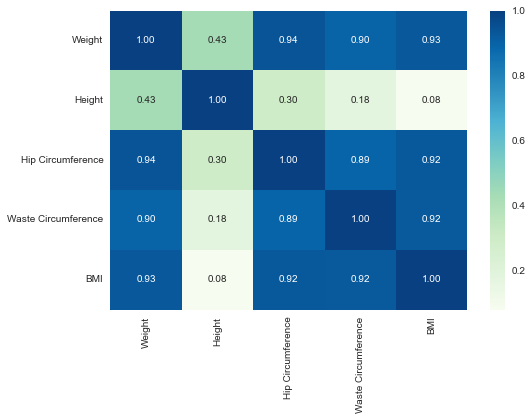

In [25]:
order = [0, 1, 2, 3, 4]
cols = np.array(['Weight', 'Height', 'Hip Circumference', 'Waste Circumference', 'BMI'])
PC = np.corrcoef(zmale_reduced.T)

sns.heatmap(
    PC[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt='.2f', cmap=cm.get_cmap('GnBu')
);

Reviewing our beautiful heatmap we can now clearly see the strong positive correlations between each of our variable pairs except for height, which we could see in the scatter pair plots above. In fact, the only correlations we can say height has is with weight and hip circumference but they are very weak in both instances. 

Our strongest correlation is between weight and hip circumference at 0.94 which is to be expected. Most people do carry extra weight on their hips.

Moving on to calculate the Spearman correlation coefficient we will need to calculate each of the coefficients manually. Unfortunately, Numpy doesn't have the same handy function `numpy.corrcoef()` for Spearman's. We will use a similar series of for loops as we did when calculating the z scores above.

In [26]:
rows = len(zmale_reduced[:,0]) # Number of rows. 
cols = len(zmale_reduced[0,:]) # Number of columns.
spearman_matrix = np.array([]) # New numpy array (for new matrix).

for i in range(cols): # for each column.
    s_col = np.array([]) # new column array (reset for each column).
    
    for j in range(cols): # for each element in current column.
        s_coef = (st.spearmanr(zmale_reduced[:,i], zmale_reduced[:,j]).correlation).round(2) # Calc Spearman.
        s_col = np.append(s_col, s_coef) # Append to columns array.
    
    s_col = s_col.reshape(-1,1) # Reshape ready to append to new matrix
    
    if len(spearman_matrix) == 0: # If s_col is the first column.
        spearman_matrix = s_col
    else:
        spearman_matrix = np.append(spearman_matrix, s_col, axis=1) # Append each s_col to the Spearman matrix. 
    
spearman_matrix[:5,:] # Preview the matrix. 

array([[1.  , 0.44, 0.94, 0.88, 0.91],
       [0.44, 1.  , 0.33, 0.16, 0.08],
       [0.94, 0.33, 1.  , 0.88, 0.91],
       [0.88, 0.16, 0.88, 1.  , 0.92],
       [0.91, 0.08, 0.91, 0.92, 1.  ]])

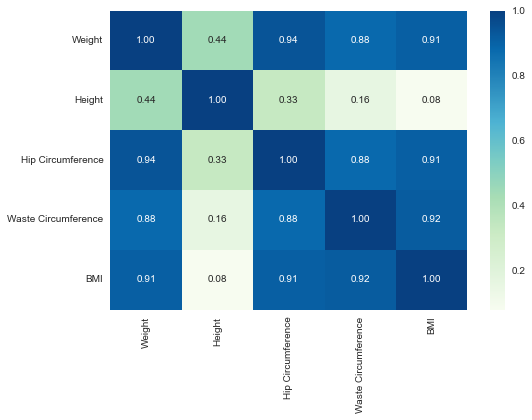

In [27]:
order = [0, 1, 2, 3, 4]
cols = np.array(['Weight', 'Height', 'Hip Circumference', 'Waste Circumference', 'BMI'])
SC = spearman_matrix.T

sns.heatmap(
    SC[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt='.2f', cmap=cm.get_cmap('GnBu')
);

At first glance, the heatmap for Spearman's rank coefficient looks very much the same as the heatmap for Pearson's coefficient. Let's take another look at Pearson's to better compare them.

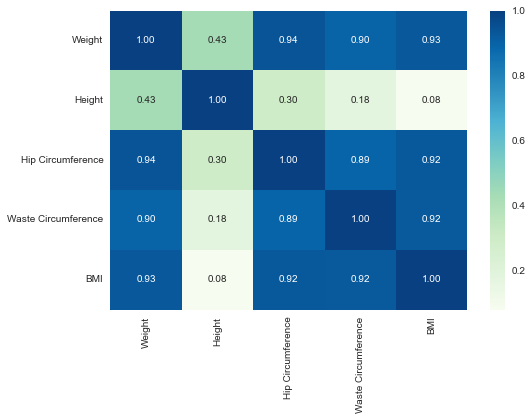

In [28]:
sns.heatmap(
    PC[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt='.2f', cmap=cm.get_cmap('GnBu')
);

After a closer inspection, it seems that the strong correlations have become stronger while the weaker correlations associated with height have become weaker. This has to do with the fact that the Spearman rank correlation coefficient is based on the ranked values for each variable when the Pearson correlation coefficient evaluates the linear relationship between the actual variables. 

<hr style="height:1px; width:100%">

<h3 style="color:#336699"> Optional Features</h3>

* Printing out the standardised body measurements for the 5 males with the lowest and highest BMI's

In [29]:
male_sorted = male[male[:,-1].argsort()]
print(f'Lowest 5 BMIs:\n{male_sorted[:5,:]}\n')
print(f'Highest 5 BMIs:\n{male_sorted[-5:,:]}')

Lowest 5 BMIs:
[[ 36.8  157.1   37.5   40.2   19.    79.5   80.    14.91]
 [ 47.9  178.    38.2   43.    22.5   82.4   70.2   15.12]
 [ 49.5  179.1   38.    44.3   22.4   82.    67.4   15.43]
 [ 46.9  174.2   38.2   40.3   22.8   80.1   67.2   15.46]
 [ 41.2  162.6   34.3   39.1   22.7   80.    66.2   15.58]]

Highest 5 BMIs:
[[174.4  173.4   40.2   39.5   46.2  154.3  155.1   58.  ]
 [181.4  174.8   43.5   45.    49.8  153.4  157.9   59.37]
 [159.6  162.3   36.4   39.3   46.4  158.3  152.2   60.59]
 [191.4  175.8   39.6   46.7   53.6  157.   161.6   61.93]
 [204.6  175.4   40.2   38.1   53.4  168.4  170.8   66.5 ]]


Based on the World Health Organisations' interpretations of BMI, the normal range is between 18.5 and 24.9. The lowest five BMIs displayed above being <16 land each of these individuals into the severely underweight category. The highest five BMIs being >40 land those individuals into Obese (Class III) category which is the highest.   

For comparison, a healthy weight range for a 170cm tall person is 52kg - 70kg and for a 180cm person 59kg - 80kg. Considering the weight (1st column) to height (2nd column) ratios above in all instances we're a long way off.  

Lastly, considering the reasonably small variation in heights between the two groups, the difference in body weights is stark. The individuals with the highest BMIs are at least three times higher than those in the lowest five BMI group and up to four times higher.

<hr style="height:1px; width:100%">
<h3> References </h3>

* [Minimalist Data Wrangling with Python](https://datawranglingpy.gagolewski.com/index.html) - Dr habil. Marek Gagolewski. 
* [Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html) - Heatmaps. 
* [Matplotlib Documentation](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html) - Various. 